# Mini Project: Employee Retention

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from __future__ import division

from chart_studio.plotly import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import graphviz  
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import linregress

import time
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from scipy.stats import skew

c:\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### About Dataset

__Goal__

Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).
In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

__Challenge Description__

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:

    ● Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
    
    ● What are the main factors that drive employee churn? Do they make sense? Explain your findings.
    
    ● If you could add to this data set just one variable that could help explain employee churn, what would that be?

__Data__

The table is: employee_retention - comprehensive information about employees. Columns:


| Field          | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| employee_id    | id of the employee. Unique by employee per company                                                   |             
| company_id     | company id                                                                                           |
| dept           | employee dept                                                                                        |
| seniority      | number of yrs of work experience when hired                                                          |
| salary         | avg yearly salary of the employee during her tenure within the company                               |
| join_date      | when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13               |
| quit_date      | when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)         |                         

#### Let us brainstorm why Employee quits:

  + Worklife balance
  + Bad managers/ colleague
  + Social pressure (Scandal)
  + Another better offer (salary, living condition)
  + Family (maternity/ paternity leave)
  + And many more

# 1. Data Exploration

## 1.1 Load Data

In [4]:
# Read CSV file: loan_train.csv
data = pd.read_csv('employee_retention_data.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [6]:
# There are lots of Nan values in quit_date -> employees quit job before

## 1.2 Data Exploration and preprocessing

In [7]:
# Convert type of "InvoiceDate" from string to datetime
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [8]:
# Check types of variable
# Numeric variable
number = [f for f in data.columns if data.dtypes[f] != 'object']

# Object variable
objects = [f for f in data.columns if data.dtypes[f] == 'object']
i = 1
for obj in number:
    print(i,'/',obj,'\t',len(data[obj].unique())) 
    i = i + 1
# Categorical variable
for obj in objects:
    print(i,'/',obj,'\t',len(data[obj].unique())) 
    i = i + 1

1 / employee_id 	 24702
2 / company_id 	 12
3 / seniority 	 31
4 / salary 	 367
5 / join_date 	 995
6 / quit_date 	 665
7 / dept 	 6


In [9]:
# Check range of numeric variable
i = 1
for obj in number:
    print(i,'/',obj,'\t min value:',data[obj].min(),'\t max value:',data[obj].max())
    i = i + 1

1 / employee_id 	 min value: 36.0 	 max value: 999969.0
2 / company_id 	 min value: 1 	 max value: 12
3 / seniority 	 min value: 1 	 max value: 99
4 / salary 	 min value: 17000.0 	 max value: 408000.0
5 / join_date 	 min value: 2011-01-24 00:00:00 	 max value: 2015-12-10 00:00:00
6 / quit_date 	 min value: 2011-10-13 00:00:00 	 max value: 2015-12-09 00:00:00


In [10]:
data['working'] = data['quit_date'].isnull().astype(int)
data['survey'] = data['quit_date']
data['survey'].fillna('2015-12-14',inplace = True)
data['survey'] = pd.to_datetime(data['survey'])
data['length'] = ((data['survey'] - data['join_date'])/np.timedelta64(1, 'D')).astype(int)
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,working,survey,length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0,2014-04-04,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1,2015-12-14,427
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,2014-08-22,1040


In [11]:
data.quit_date.max()

Timestamp('2015-12-09 00:00:00')

In [12]:
employees_at_survey = data.groupby(['company_id','working'])['working'].count()
employees_at_survey

company_id  working
1           0          4621
            1          3865
2           0          2206
            1          2016
3           0          1531
            1          1218
4           0          1153
            1           909
5           0           983
            1           772
6           0           712
            1           579
7           0           692
            1           532
8           0           579
            1           468
9           0           529
            1           432
10          0           480
            1           385
11          0            12
            1             4
12          0            12
            1            12
Name: working, dtype: int64

In [13]:
employees_count = data.groupby(['company_id'])['employee_id'].count().reset_index()
employees_count

,company_id,employee_id
0,1,8486
1,2,4222
2,3,2749
3,4,2062
4,5,1755
5,6,1291
6,7,1224
7,8,1047
8,9,961
9,10,865


### 1.2.1 The length of time in the job

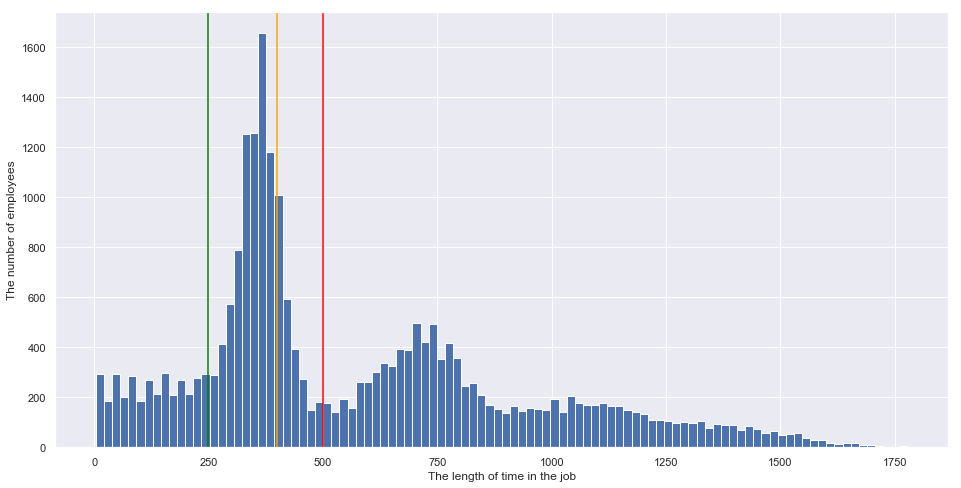

In [14]:
# Visuallization
# Histogram
sns.set()
fig = plt.figure(figsize = (16,8))
# fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(data.length,bins = 100)
ax.axvline(x=500,color='red')
ax.axvline(x=400,color='orange')
ax.axvline(x=250,color='green')
plt.xlabel('The length of time in the job')
plt.ylabel('The number of employees')
plt.show()

### 1.2.2 Dept

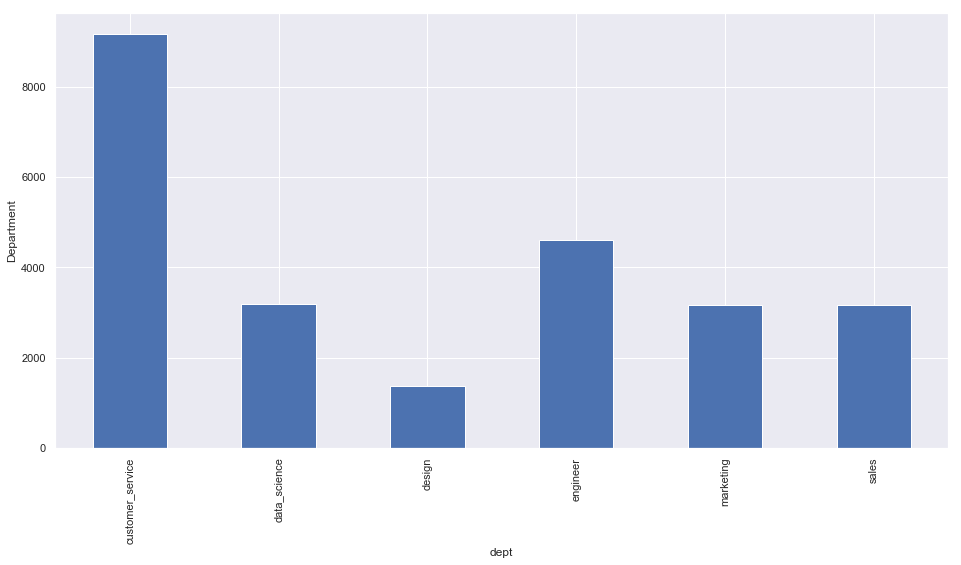

In [16]:
# Dept
count_dept = data.groupby('dept')['dept'].count()
sns.set()
plt.figure(figsize = (16,8))
plt.xlabel('The number of employees per dept')
plt.ylabel('Department')
count_dept.plot.bar()

In [17]:
# -> Looks like most of our employee are in customer service jobs.

### 1.2.3 Length time in the job vs. Deparment type and Company

<Figure size 1152x576 with 0 Axes>

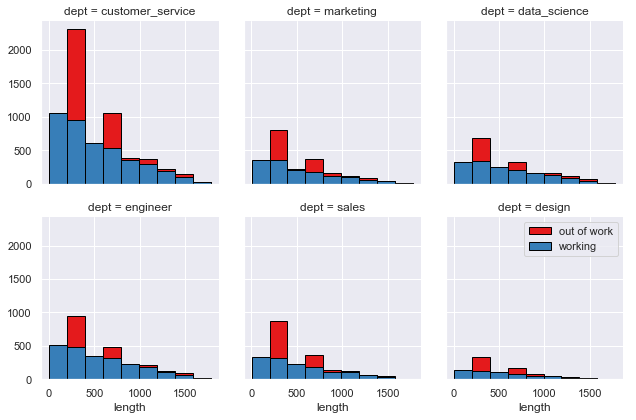

In [18]:
sns.set()
plt.figure(figsize = (16,8))
bins1 = np.linspace(data.length.min(),data.length.max(),10)
g_prin = sns.FacetGrid(data, col = 'dept', hue = 'working', palette = 'Set1', col_wrap = 3, height=3,aspect=1,)
g_prin.map(plt.hist,'length', edgecolor="black", bins = bins1)
g_prin.axes[-1].legend()
plt.legend(('out of work','working'))
plt.show()

<Figure size 1152x576 with 0 Axes>

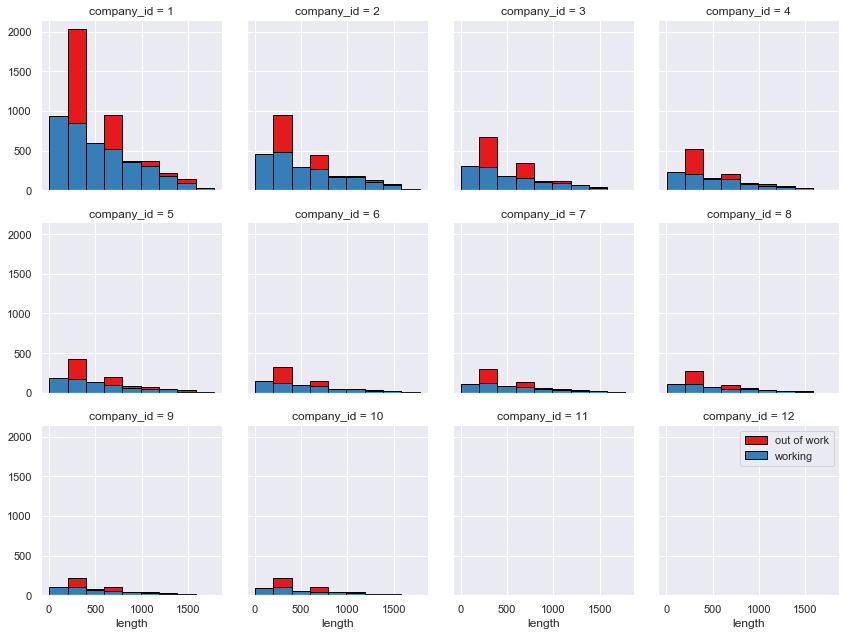

In [19]:
sns.set()
plt.figure(figsize = (16,8))
bins2 = np.linspace(data.length.min(),data.length.max(),10)
g_prin = sns.FacetGrid(data, col = 'company_id', hue = 'working', palette = 'Set1', col_wrap = 4, height=3,aspect=1,)
g_prin.map(plt.hist,'length', edgecolor="black", bins = bins2)
g_prin.axes[-1].legend()
plt.legend(('out of work','working'))
plt.show()

In [20]:
print('Company_id 11:', data[data['company_id']==11].count())
print('-----------------------------')
print('Company_id 12:',data[data['company_id']==12].count())

Company_id 11: employee_id    16
company_id     16
dept           16
seniority      16
salary         16
join_date      16
quit_date      12
working        16
survey         16
length         16
dtype: int64
-----------------------------
Company_id 12: employee_id    24
company_id     24
dept           24
seniority      24
salary         24
join_date      24
quit_date      12
working        24
survey         24
length         24
dtype: int64


### 1.2.4 Correlation betweeb salary and working

0.006110336494321685
r-squared: 0.006110336494321685


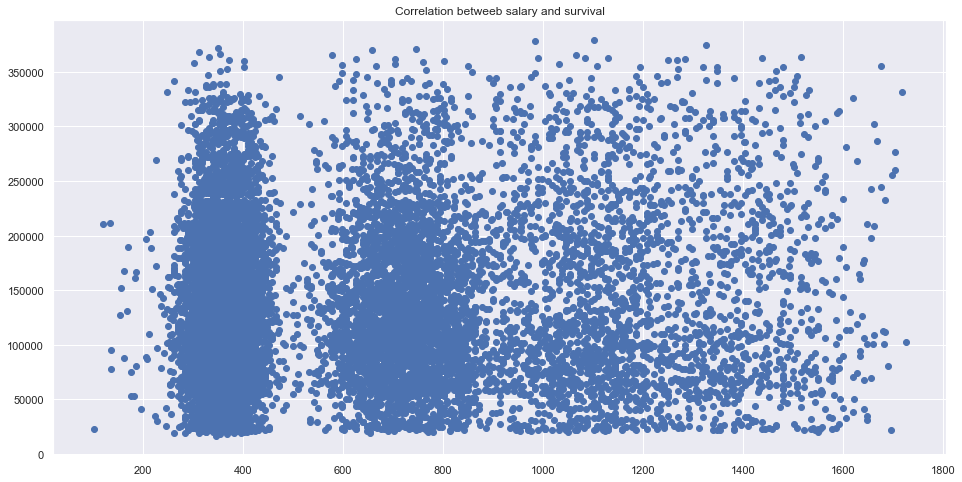

In [23]:
# matplotlib plotting
sns.set()
plt.figure(figsize = (16,8))
plt.title('Correlation betweeb salary and survival')
 
y = data.loc[data['working']==0,'salary']
x = data.loc[data['working']==0,'length']

correlation = np.corrcoef(x, y)[0,1]
rsq = correlation**2
plt.scatter(x,y, marker='o', c='b',) # plot my data points

print(rsq)

slope, intercept, r_value, p_value, std_err = linregress(x,y)

print("r-squared:", r_value**2)

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 1152x576 with 0 Axes>

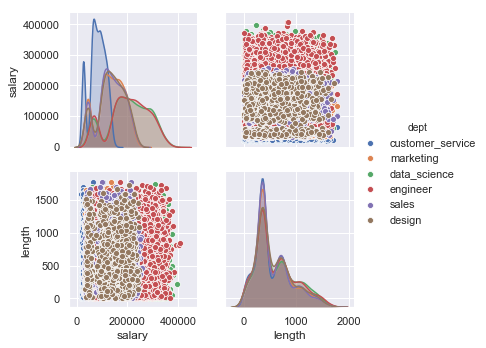

In [24]:
sns.set()
plt.figure(figsize = (16,8))
sns.pairplot(data[['salary','length','dept']],hue="dept")
plt.show()

### 1.2.5 Seniority vs working time in the job

In [25]:
df_se_survi = data[data['working']==0].groupby('seniority')['length'].median()

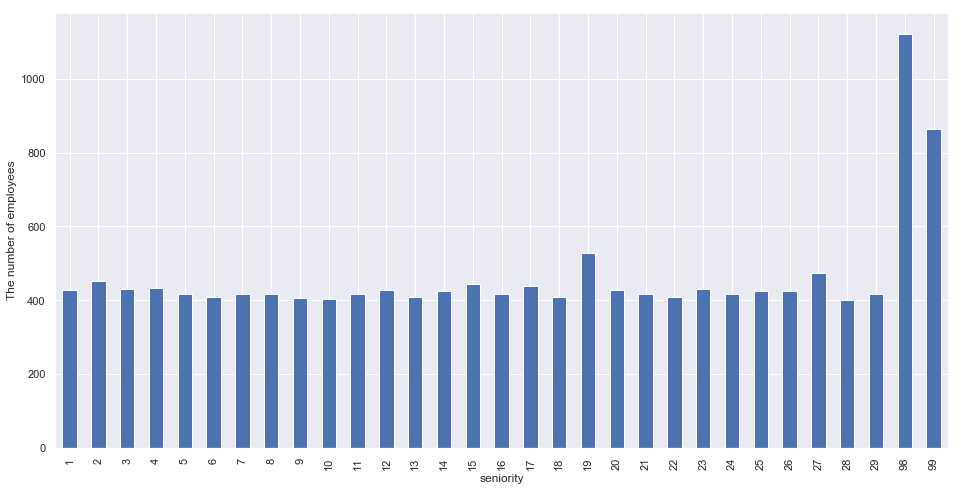

In [26]:
sns.set()
plt.figure(figsize = (16,8))
plt.xlabel('Working time in the job')
plt.ylabel('The number of employees')
df_se_survi.plot.bar()

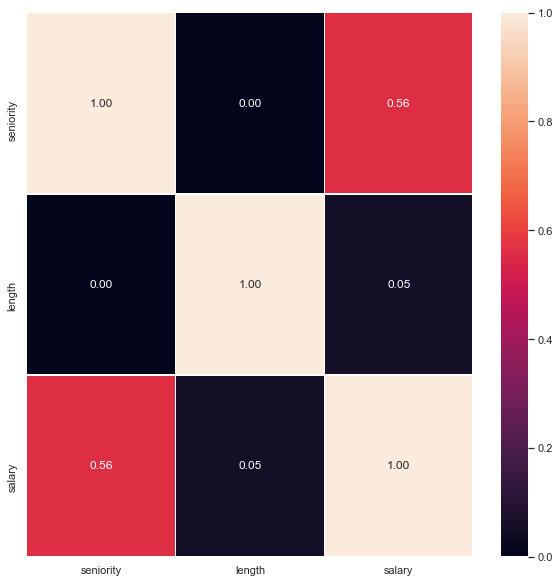

In [27]:

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data[['seniority','length','salary']].corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

In [28]:
#-> Nhận xét:

### 1.2.6 Create table of company, date, employee head count

In [29]:
# Thống kê sự thay đổi theo từng ngày của từng công ty
dates = pd.date_range(start='2011/01/24',end='2015/12/13')
temp = {'date': dates}
temp = pd.DataFrame(data=temp)
temp['key'] = 0

In [30]:
unique_company = data['company_id'].unique()
temp1 = {'company_id':unique_company}
temp1 = pd.DataFrame(data=temp1)
temp1['key'] = 0


In [31]:
combine = pd.merge(temp, temp1,on='key')
combine.drop('key',1, inplace=True)
combine.head()

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1


In [32]:
join_day = data.groupby(['company_id','join_date'])['company_id','join_date'].sum()
join_day.columns = ['number_join']
join_day.reset_index(inplace=True)
join_day.columns = ['company_id','date','number_join']
join_day['date'] = pd.to_datetime(join_day['date'])
join_day.head()

,company_id,date,number_join
0,1,2011-01-24,25
1,1,2011-01-25,2
2,1,2011-01-26,2
3,1,2011-01-31,30
4,1,2011-02-01,7


In [33]:
quit_day = data.groupby(['company_id','quit_date'])['company_id','quit_date'].sum()
quit_day.columns = ['number_quit']
quit_day.reset_index(inplace=True)
quit_day.columns = ['company_id','date','number_quit']
quit_day['date'] = pd.to_datetime(quit_day['date'])
quit_day.head()

,company_id,date,number_quit
0,1,2011-10-21,1
1,1,2011-11-11,1
2,1,2011-11-22,1
3,1,2011-11-25,1
4,1,2011-12-09,1


In [34]:
test = pd.merge(combine,join_day,left_on = ['company_id','date'],right_on = ['company_id','date'],how='left').fillna(0)
test['number_join'].sum()

84653.0

In [35]:
test2 = pd.merge(test,quit_day,left_on = ['company_id','date'],right_on = ['company_id','date'],how='left').fillna(0)
test2['number_quit'].sum()

46738.0

In [36]:
test2['employee_count'] = test2['number_join']-test2['number_quit']
test2.drop(['number_quit','number_join'],1,inplace = True)

In [37]:
test2.head()

,date,company_id,employee_count
0,2011-01-24,7,7.0
1,2011-01-24,4,48.0
2,2011-01-24,2,34.0
3,2011-01-24,9,27.0
4,2011-01-24,1,25.0


In [38]:
employees_table = test2.groupby(['date','company_id']).sum().groupby('company_id').cumsum().reset_index()
employees_table.head(10)

,date,company_id,employee_count
0,2011-01-24,1,25.0
1,2011-01-24,2,34.0
2,2011-01-24,3,27.0
3,2011-01-24,4,48.0
4,2011-01-24,5,25.0
5,2011-01-24,6,18.0
6,2011-01-24,7,7.0
7,2011-01-24,8,48.0
8,2011-01-24,9,27.0
9,2011-01-24,10,0.0


In [39]:
employees_table.shape

(21420, 3)

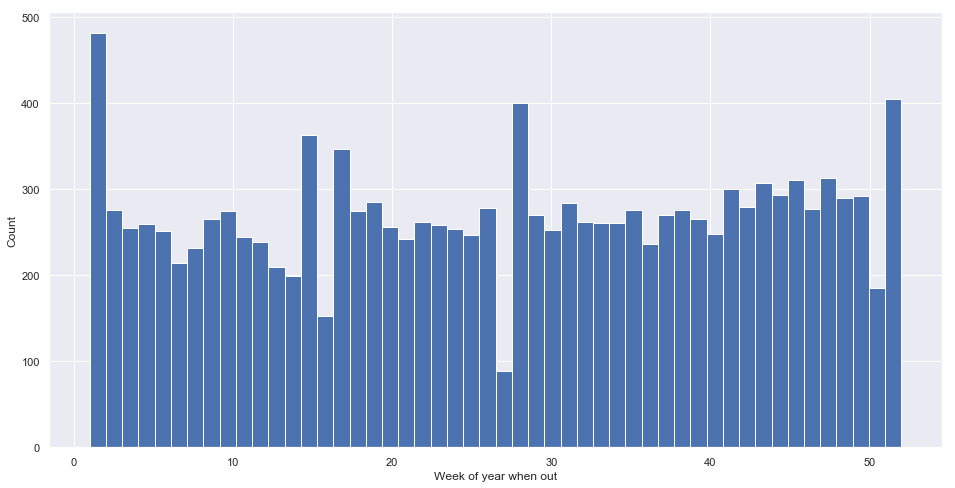

In [40]:
week_of_year = data.quit_date.apply(lambda x: x.week)
week_of_year
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Week of year when out')
ax.set_ylabel('Count')
ax.hist(week_of_year[np.isfinite(week_of_year)],bins =50)
plt.show()

In [41]:
#-> It look like employees tend to quit job around New Year's. 
#May be because they get bonus and it easy to find a new job in this time

### 1.2.7 Encoding data

In [42]:
data = pd.get_dummies(data)

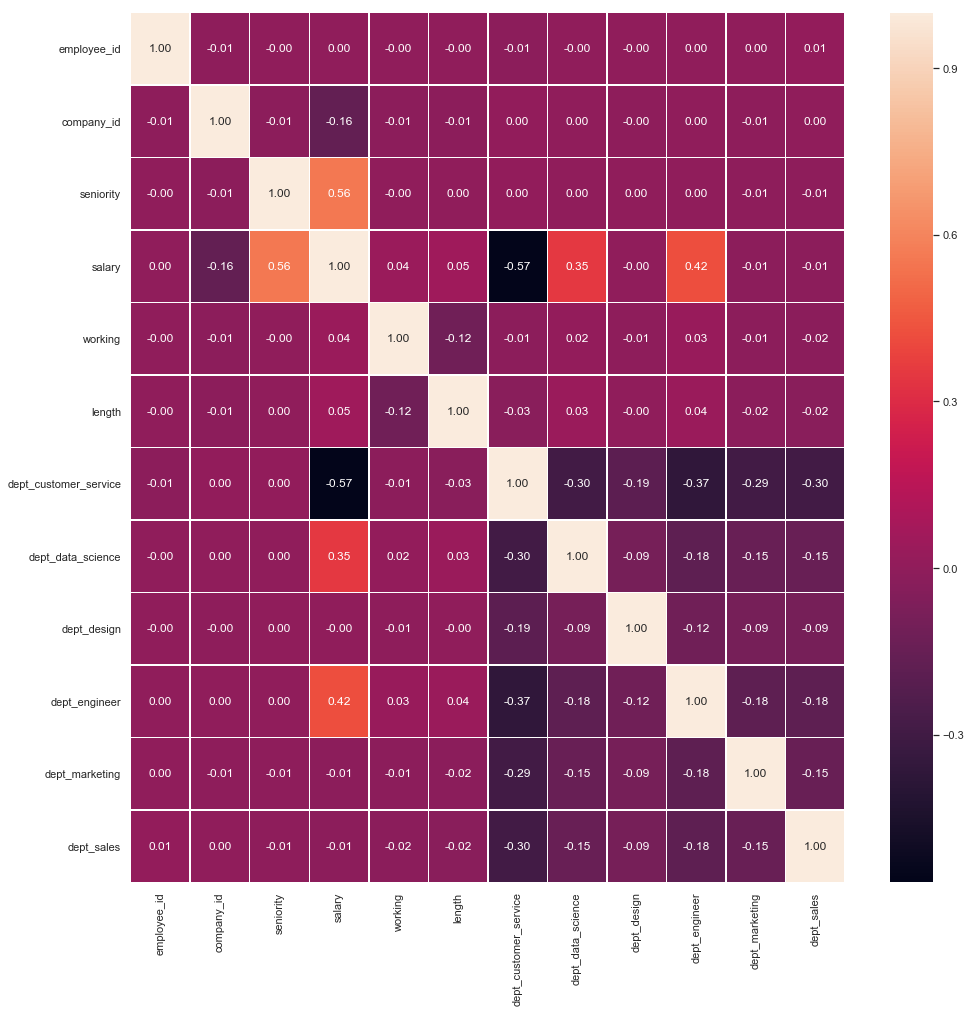

In [43]:
# data_visual = data.drop(['employ_id','comapy_id','join_date','quit_date'],axis =1)
# data.corr() 
f, ax = plt.subplots(figsize = (16,16))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

# 2. Model predict 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data[['company_id','dept_customer_service','dept_data_science','dept_design','dept_engineer','dept_marketing','dept_sales','seniority','salary','length']], data['working'], test_size=0.25, random_state=4)

In [62]:

tree_clf = DecisionTreeClassifier()

tree_clf = tree_clf.fit(X_train, y_train)
predicted = tree_clf.predict(X_test)

In [63]:
accuracy_score(predicted, y_test)

0.913050518134715

In [64]:
tree_clf.feature_importances_

array([0.02385659, 0.00193221, 0.00314398, 0.00285673, 0.00342238,
       0.00303036, 0.00416188, 0.03891577, 0.05925289, 0.85942721])

In [65]:
# Evaluation
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred = predicted)
print("confusion matrix:\n", conf_matrix)

confusion matrix:
 [[3091  267]
 [ 270 2548]]


In [66]:
#Print classification report using predictions
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3358
           1       0.91      0.90      0.90      2818

    accuracy                           0.91      6176
   macro avg       0.91      0.91      0.91      6176
weighted avg       0.91      0.91      0.91      6176



<BarContainer object of 10 artists>

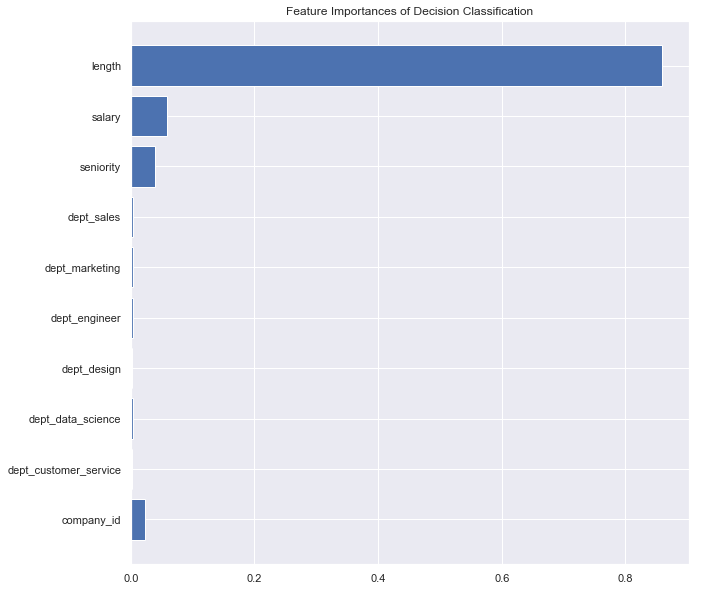

In [67]:
importnce = tree_clf.feature_importances_
plt.figure(figsize=(10,10))
plt.title("Feature Importances of Decision Classification")
plt.barh(X_train.columns, importnce, align="center")